In [35]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

In [36]:
# Step 0 obtain data
digits = load_digits()
print("data size=",digits.data.shape)

data size= (1797, 64)


In [37]:
dir(digits)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

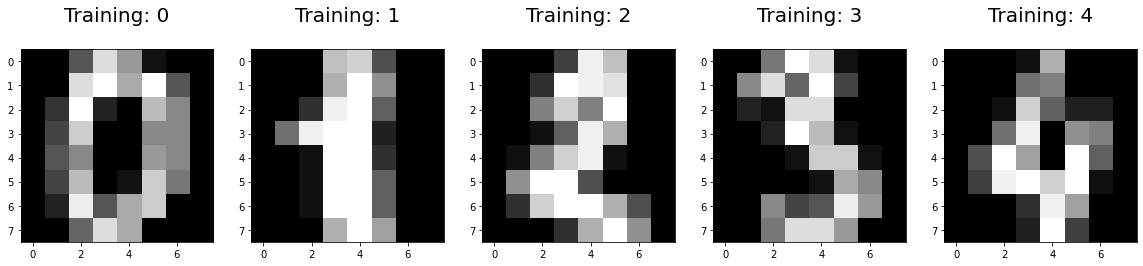

In [38]:
# Understand the data by viewing the images
# Step 1 pre-processing (not needed)
# Step 2 Featue extraction (not needed)

plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [39]:
# Step 3: Spit data into training and testing, and fit the right classificaiton mdoel

# test_size: what proportion of original data is used for test set
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

## Logistic Regression

In [40]:
LinReg = LogisticRegression() 
## Returns a NumPy Array
## Predict for One Observation (image)
#logisticRegr.predict(x_test[0].reshape(1,-1))
## Predict for Multiple Observations (images) at Once
#logisticRegr.predict(x_test[0:10])
## Make predictions on entire test data
LinReg.fit(x_train, y_train)
linreg_predictions = LinReg.predict(x_test)
linreg_predictions.shape

/opt/anaconda3/envs/ldeville/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(450,)

In [41]:
# Use score method to get accuracy of model
linreg_score = LinReg.score(x_test, y_test)
print(linreg_score)

0.9511111111111111


Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


<Figure size 432x288 with 0 Axes>

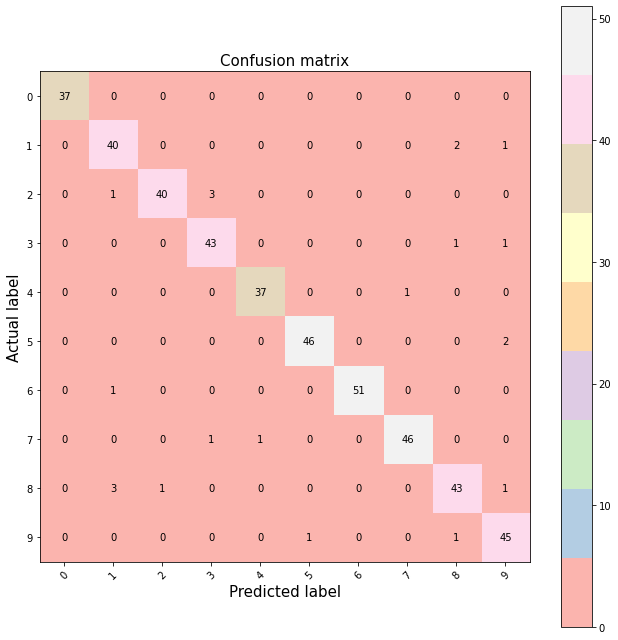

In [42]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, linreg_predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

The number of incorrect predictions is 22


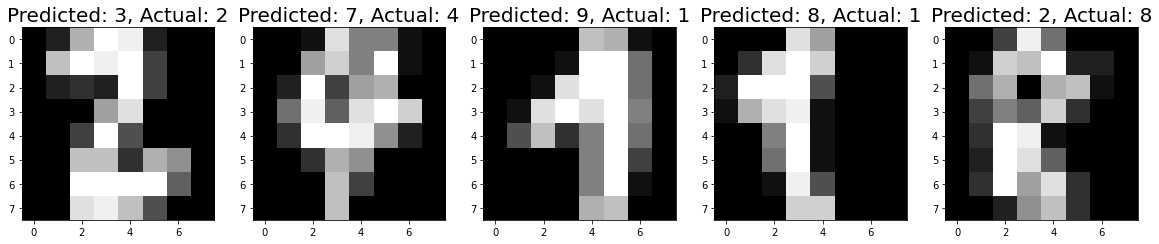

In [47]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, linreg_predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndexes[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(linreg_predictions[wrong], y_test[wrong]), fontsize = 20)
    
print('The number of incorrect predictions is ' + str(len(misclassifiedIndexes)))

## Support Vector Classification

In [48]:
SVClass = SVC()
SVClass.fit(x_train, y_train)
svc_predictions = SVClass.predict(x_test)
svc_predictions.shape

(450,)

In [49]:
# Use score method to get accuracy of model
svc_score = SVClass.score(x_test, y_test)
print(svc_score)

0.9911111111111112


Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


<Figure size 432x288 with 0 Axes>

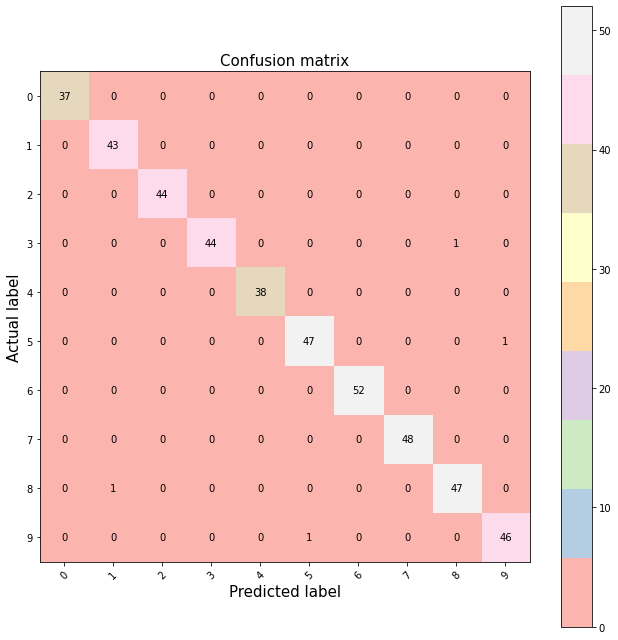

In [50]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, svc_predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

The number of incorrect predictions is 4


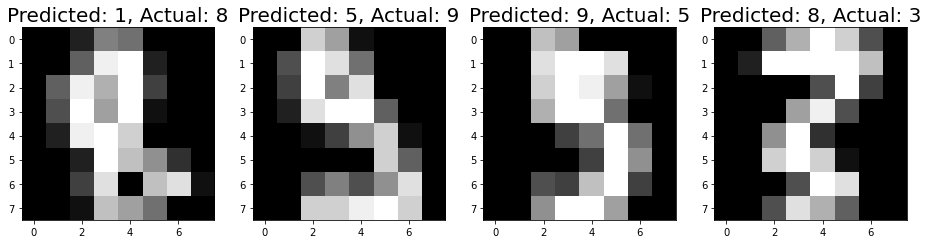

In [51]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, svc_predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndexes[0:4]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(svc_predictions[wrong], y_test[wrong]), fontsize = 20)
    
print('The number of incorrect predictions is ' + str(len(misclassifiedIndexes)))

## Random Forest Classificaiton

In [52]:
RndFst = RandomForestClassifier()
RndFst.fit(x_train,y_train)
rf_predictions = RndFst.predict(x_test)
rf_predictions.shape

(450,)

In [53]:
rf_score = RndFst.score(x_test, y_test)
print(rf_score)

0.9755555555555555


Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 1  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  2  0  0]
 [ 0  0  0  1  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  0  1 45  0]
 [ 0  0  0  1  0  0  0  0  0 46]]


<Figure size 432x288 with 0 Axes>

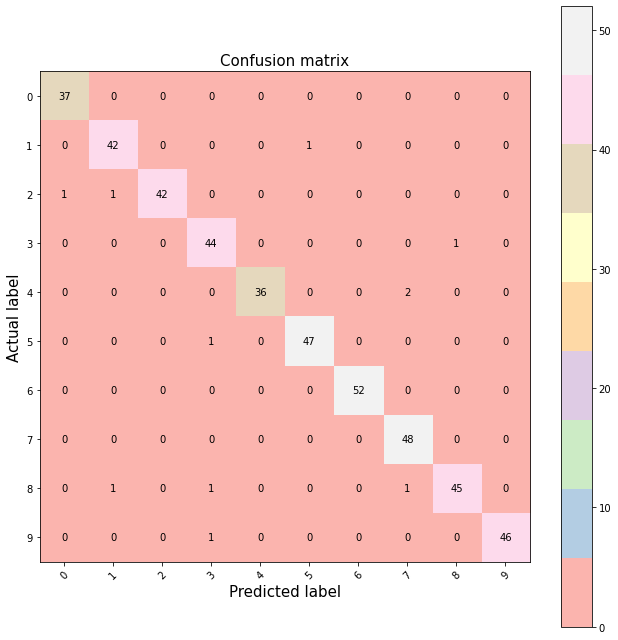

In [54]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, rf_predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

The number of incorrect predictions is 11


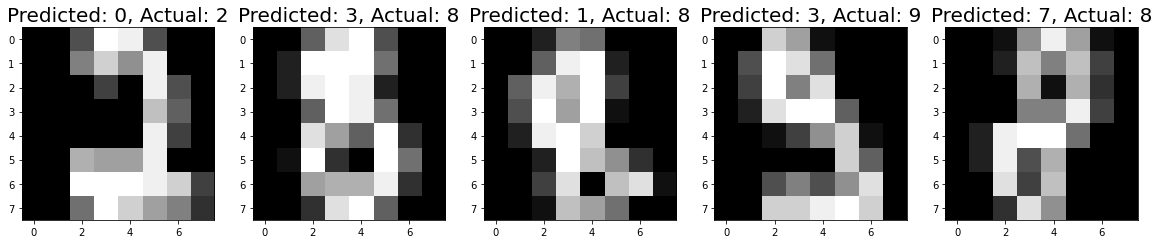

In [55]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, rf_predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(rf_predictions[wrong], y_test[wrong]), fontsize = 20)
    
print('The number of incorrect predictions is ' + str(len(misclassifiedIndexes)))